# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json
import random


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from pprint import pprint
from api_keys import wm_key

from IPython.display import Image


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# # Build query URL, GET Request and save the API's response 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + wm_key 

#list of city data
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 100 for logging purposes
    if (i % 100 == 0 and i >= 100):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | samusu
City not found. Skipping...
Processing Record 7 of Set 1 | saint-francois
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | bilma
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | airai
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | ilorin
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | richards bay
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | araouane
Processing Record 21 of Set 1 | lensk
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | 

Processing Record 82 of Set 2 | sri aman
Processing Record 83 of Set 2 | mount gambier
Processing Record 84 of Set 2 | ponta delgada
Processing Record 85 of Set 2 | parainen
City not found. Skipping...
Processing Record 86 of Set 2 | clyde river
Processing Record 87 of Set 2 | bulgan
Processing Record 88 of Set 2 | sawtell
Processing Record 89 of Set 2 | westport
Processing Record 90 of Set 2 | quzhou
Processing Record 91 of Set 2 | aswan
Processing Record 92 of Set 2 | port macquarie
Processing Record 93 of Set 2 | meyungs
City not found. Skipping...
Processing Record 94 of Set 2 | taltal
Processing Record 95 of Set 2 | longyearbyen
Processing Record 96 of Set 2 | provideniya
Processing Record 97 of Set 2 | bonfim
Processing Record 98 of Set 2 | bahia blanca
Processing Record 99 of Set 2 | sherghati
Processing Record 0 of Set 3 | cavalcante
Processing Record 1 of Set 3 | high level
Processing Record 2 of Set 3 | atambua
Processing Record 3 of Set 3 | klaksvik
Processing Record 4 of Se

Processing Record 68 of Set 4 | pochutla
Processing Record 69 of Set 4 | togur
Processing Record 70 of Set 4 | pizarro
Processing Record 71 of Set 4 | severnyy
City not found. Skipping...
Processing Record 72 of Set 4 | shenjiamen
Processing Record 73 of Set 4 | excelsior springs
Processing Record 74 of Set 4 | manama
Processing Record 75 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 76 of Set 4 | nantucket
Processing Record 77 of Set 4 | carauari
Processing Record 78 of Set 4 | tselina
Processing Record 79 of Set 4 | margate
Processing Record 80 of Set 4 | maputo
Processing Record 81 of Set 4 | behshahr
Processing Record 82 of Set 4 | kushiro
Processing Record 83 of Set 4 | pangkalanbuun
Processing Record 84 of Set 4 | fortuna
Processing Record 85 of Set 4 | myrtle grove
Processing Record 86 of Set 4 | cotija
City not found. Skipping...
Processing Record 87 of Set 4 | tshela
Processing Record 88 of Set 4 | mountain home
Processing Record 89 of Set 4 | maniitsoq

Processing Record 57 of Set 6 | mangrol
Processing Record 58 of Set 6 | rawannawi
City not found. Skipping...
Processing Record 59 of Set 6 | srednekolymsk
Processing Record 60 of Set 6 | dharchula
Processing Record 61 of Set 6 | safwah
City not found. Skipping...
Processing Record 62 of Set 6 | irbil
City not found. Skipping...
Processing Record 63 of Set 6 | tena
Processing Record 64 of Set 6 | amudat
Processing Record 65 of Set 6 | chernyshevskiy
Processing Record 66 of Set 6 | zhigansk
Processing Record 67 of Set 6 | petukhovo
Processing Record 68 of Set 6 | batagay
Processing Record 69 of Set 6 | natal
Processing Record 70 of Set 6 | auki
Processing Record 71 of Set 6 | bid
City not found. Skipping...
Processing Record 72 of Set 6 | barsovo
Processing Record 73 of Set 6 | san rafael
Processing Record 74 of Set 6 | gizycko
Processing Record 75 of Set 6 | beloha
Processing Record 76 of Set 6 | karamea
City not found. Skipping...
Processing Record 77 of Set 6 | jardim
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Convert array of JSONs into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

In [7]:
# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,40,EC,1559164777,61,-0.74,-90.35,82.40,19.46
1,rikitea,56,PF,1559164778,80,-23.12,-134.97,76.94,22.28
2,tasiilaq,0,GL,1559164778,69,65.61,-37.64,37.40,8.05
3,barrow,97,AR,1559164778,64,-38.31,-60.23,48.32,4.43
4,vaini,80,IN,1559164778,87,15.34,74.49,80.00,2.48


In [8]:
#export .csv
city_data_df.to_csv("city_data.csv", index=False, header=True)

In [9]:
#record count
city_data_df.count()

City          545
Cloudiness    545
Country       545
Date          545
Humidity      545
Lat           545
Lng           545
Max Temp      545
Wind Speed    545
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

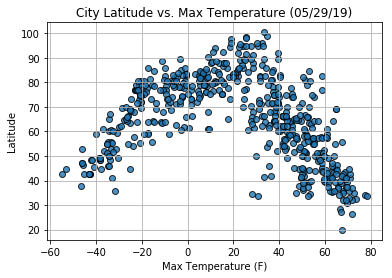

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Max Temperature (F)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityTemp.png", transparent=True)
plt.show()

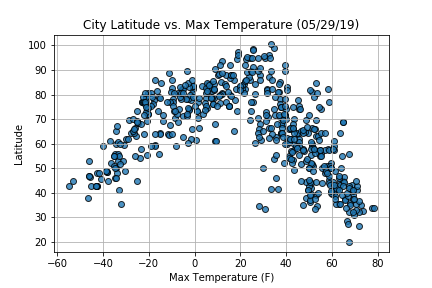

In [11]:
#see exported image (ensure it exported properly)
Image(filename='CityTemp.png') 

#### Latitude vs. Humidity Plot

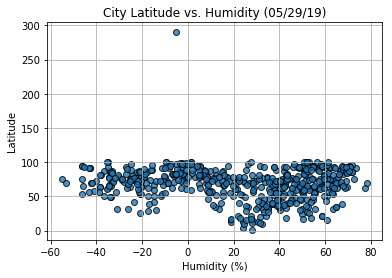

In [12]:
# Build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityHumidity.png", transparent=True)
plt.show()

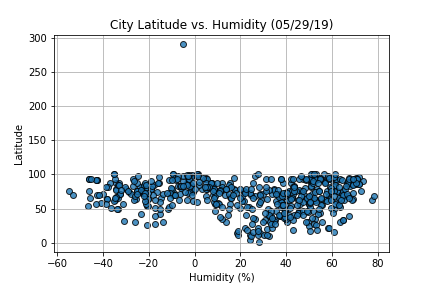

In [13]:
#see exported image (ensure it exported properly)
Image(filename='CityHumidity.png') 

#### Latitude vs. Cloudiness Plot

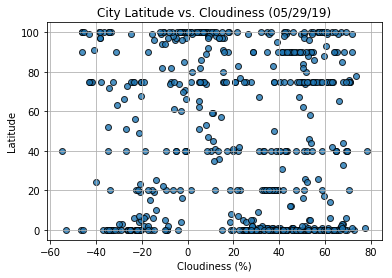

In [14]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityCloud.png", transparent=True)
plt.show()


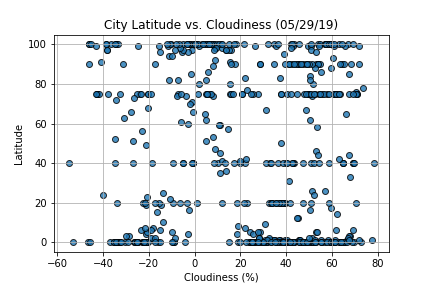

In [15]:
#see exported image (ensure it exported properly)
Image(filename='CityCloud.png') 

#### Latitude vs. Wind Speed Plot

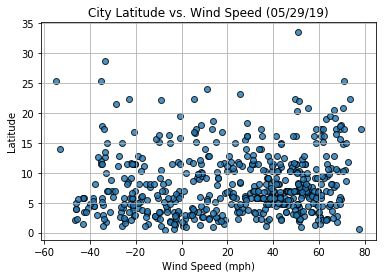

In [16]:
# Build scatter plot for latitude vs. Wind
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", 
            linewidths=1, 
            marker="o", 
            alpha=0.8, 
            label="Cities")

#Plot labels
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()

#save image
plt.savefig("CityWind.png", transparent=True)
plt.show()

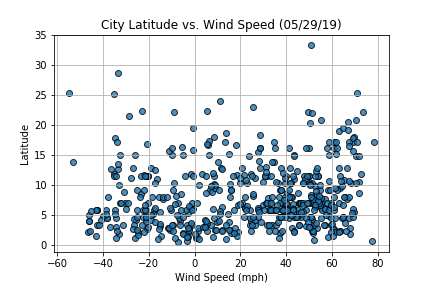

In [17]:
#see exported image (ensure it exported properly)
Image(filename='CityWind.png') 